In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# Load the data
df = pd.read_csv('revenue_data.csv', parse_dates=['Date'], index_col='Date')





/var/folders/3h/gyjhfd6n4x90xqnt81z5t1sm0000gn/T/ipykernel_76190/985108244.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('revenue_data.csv', parse_dates=['Date'], index_col='Date')


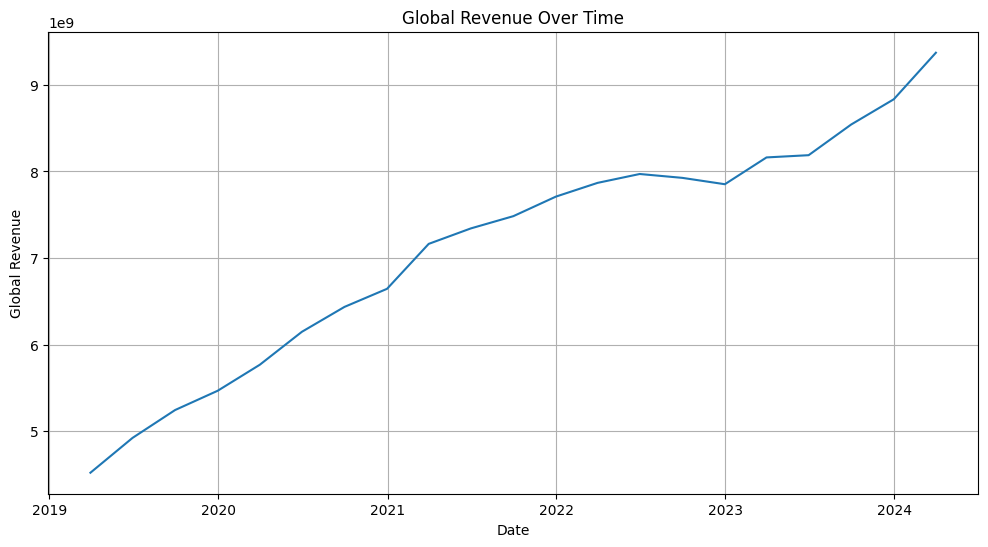

In [8]:

# Plot Global Revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global Revenue'])
plt.title('Global Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Global Revenue')
plt.grid(True)
plt.show()


/Users/someone./Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/Users/someone./Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/Users/someone./Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error: 661203987.3479396


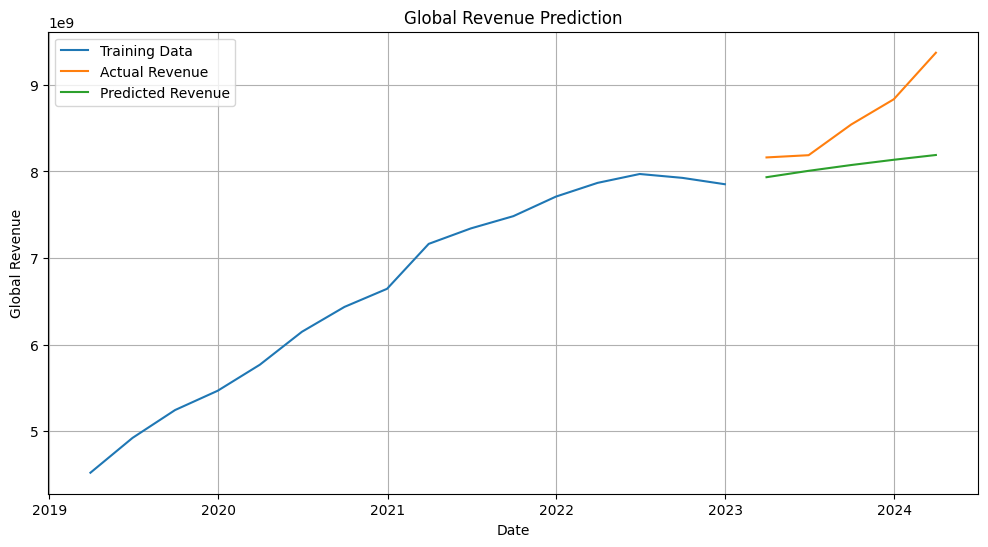

In [9]:

# Prepare data for ARIMA model
revenue_data = df['Global Revenue']

# Split the data into training and testing sets
train_size = int(len(revenue_data) * 0.8)
train, test = revenue_data[:train_size], revenue_data[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
results = model.fit()

# Make predictions
predictions = results.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Revenue')
plt.plot(test.index, predictions, label='Predicted Revenue')
plt.title('Global Revenue Prediction')
plt.xlabel('Date')
plt.ylabel('Global Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Predict future revenue (next 4 quarters)


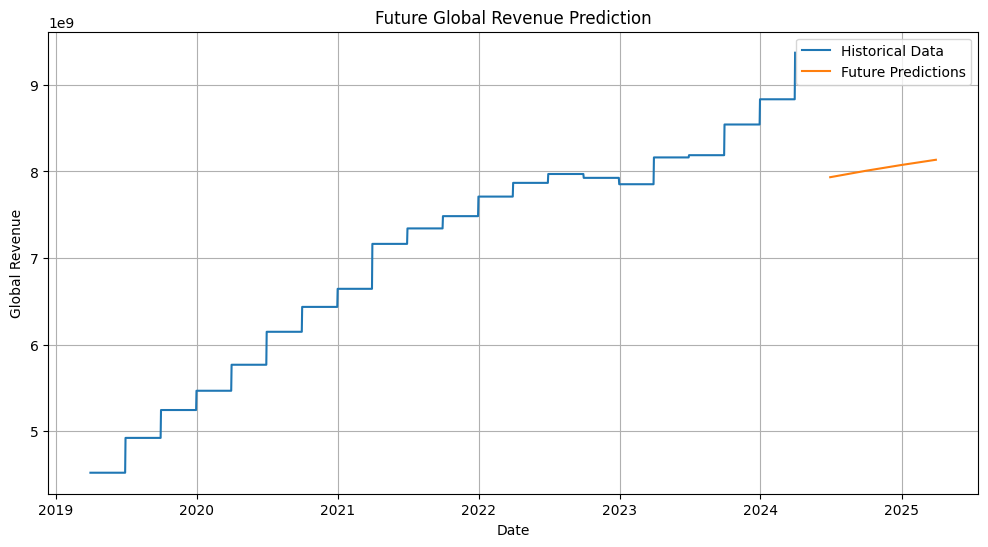

Predicted Global Revenue for the next 4 quarters:
2024-06-30: $7,933,190,624
2024-09-30: $8,006,849,862
2024-12-31: $8,073,719,993
2025-03-31: $8,134,426,761


In [22]:
# Predict future revenue (next 4 quarters)
future_predictions = results.forecast(steps=4)

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=3), periods=4, freq='Q')

# Visualize future predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global Revenue'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.title('Future Global Revenue Prediction')
plt.xlabel('Date')
plt.ylabel('Global Revenue')
plt.legend()
plt.grid(True)
plt.show()

print("Predicted Global Revenue for the next 4 quarters:")
for date, prediction in zip(future_dates, future_predictions):
    print(f"{date.strftime('%Y-%m-%d')}: ${prediction:,.0f}")

/var/folders/3h/gyjhfd6n4x90xqnt81z5t1sm0000gn/T/ipykernel_76190/3912483334.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('revenue_data.csv', parse_dates=['Date'], index_col='Date')


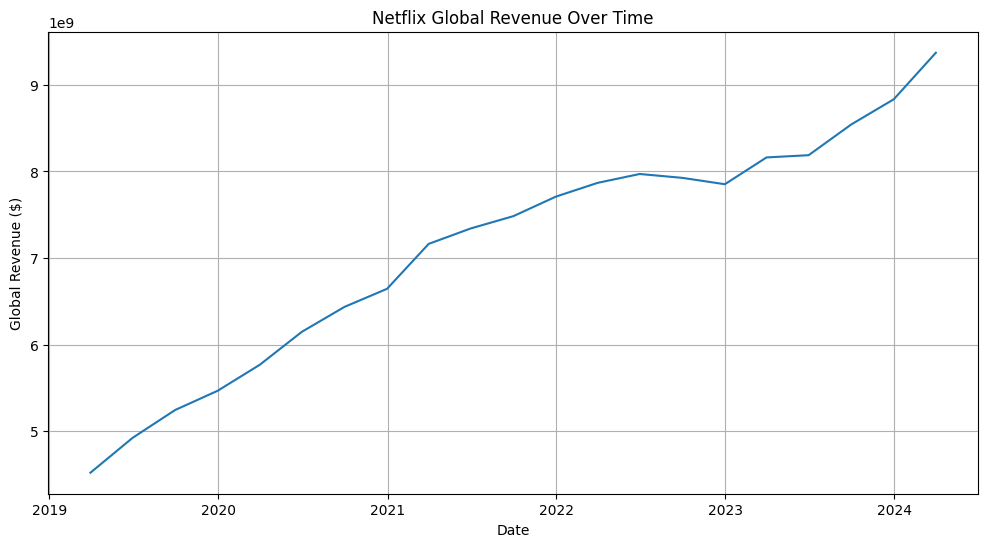

/Users/someone./Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/Users/someone./Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/Users/someone./Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/Users/someone./Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


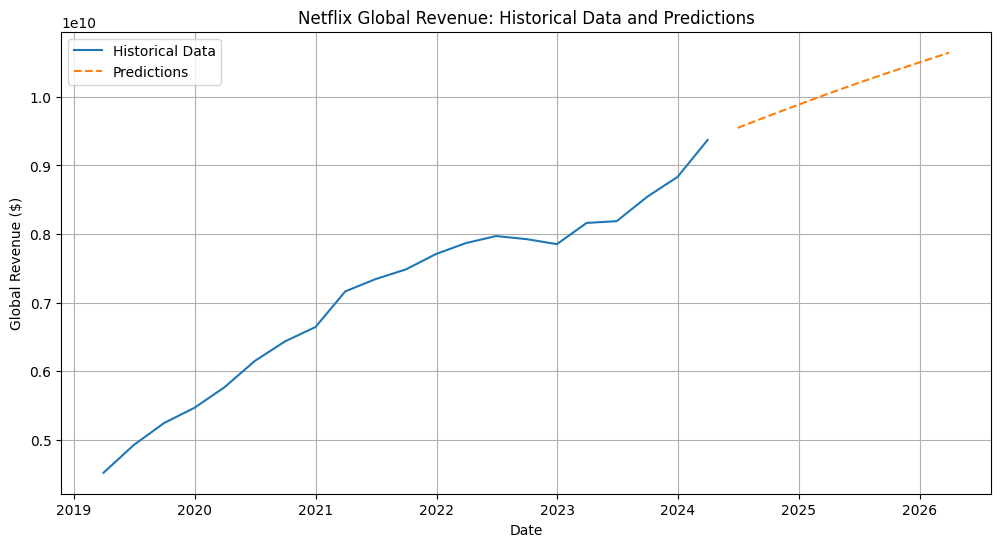

Predicted Global Revenue for the next 8 quarters:
            Predicted Revenue
2024-06-30       9.547341e+09
2024-09-30       9.718794e+09
2024-12-31       9.884965e+09
2025-03-31       1.004602e+10
2025-06-30       1.020211e+10
2025-09-30       1.035340e+10
2025-12-31       1.050002e+10
2026-03-31       1.064213e+10

Predictions with percentage change from last actual revenue:
            Predicted Revenue  Percentage Change
2024-06-30       9.547341e+09           1.887865
2024-09-30       9.718794e+09           3.717582
2024-12-31       9.884965e+09           5.490942
2025-03-31       1.004602e+10           7.209682
2025-06-30       1.020211e+10           8.875483
2025-09-30       1.035340e+10          10.489976
2025-12-31       1.050002e+10          12.054742
2026-03-31       1.064213e+10          13.571311


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv('revenue_data.csv', parse_dates=['Date'], index_col='Date')

# Sort the index to ensure chronological order
df = df.sort_index()

# Plot Global Revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global Revenue'])
plt.title('Netflix Global Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Global Revenue ($)')
plt.grid(True)
plt.show()

# Prepare data for ARIMA model
revenue_data = df['Global Revenue']

# Fit ARIMA model
model = ARIMA(revenue_data, order=(1,1,1))
results = model.fit()

# Generate predictions for the next 8 quarters
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=3), periods=8, freq='Q')
future_predictions = results.forecast(steps=8)

# Create a DataFrame with the predictions
future_df = pd.DataFrame({'Predicted Revenue': future_predictions}, index=future_dates)

# Visualize historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global Revenue'], label='Historical Data')
plt.plot(future_df.index, future_df['Predicted Revenue'], label='Predictions', linestyle='--')
plt.title('Netflix Global Revenue: Historical Data and Predictions')
plt.xlabel('Date')
plt.ylabel('Global Revenue ($)')
plt.legend()
plt.grid(True)
plt.show()

# Print predictions
print("Predicted Global Revenue for the next 8 quarters:")
print(future_df)

# Calculate percentage change from last actual revenue
last_actual_revenue = df['Global Revenue'].iloc[-1]
future_df['Percentage Change'] = (future_df['Predicted Revenue'] - last_actual_revenue) / last_actual_revenue * 100

print("\nPredictions with percentage change from last actual revenue:")
print(future_df)
